In [67]:
from lib.imports import *

In [ ]:
X,y = load_nursing_by_index(1,data_dir=f'../data/nursingv1/',label_dir=f'../data/nursingv1_musa/')

In [ ]:
"""
MLP just based on x-signal
"""
trainloader = DataLoader(TensorDataset(X[:,0].unsqueeze(1),y),batch_size=32,shuffle=True)

class MLP1d(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1,5)
        self.fc2 = nn.Linear(5,1)
    def forward(self, x):
        x = self.fc1(x)
        x = relu(x)
        x = self.fc2(x)
        return x  
device = 'cuda'
model = MLP1d().to(device=device)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())
params = sum([p.flatten().size()[0] for p in list(model.parameters())])
print("Params: ",params)

In [ ]:
lossi = []
model.train()

for i in range(10):
    for (X_tr,y_tr) in tqdm(trainloader):
        X_tr,y_tr = X_tr.to(device),y_tr.to(device)
        logits = model(X_tr)
        loss = criterion(logits,y_tr)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        lossi.append(loss.item())
        
plt.plot(lossi)
print(torch.tensor(lossi).mean())
test_evaluation(trainloader,model,criterion)

In [ ]:
x = torch.linspace(-20,20,1000).unsqueeze(1)
plt.plot(x,torch.sigmoid(model(x.cuda()).flatten().detach().cpu()))

In [ ]:
"""
MLP based on xyz signal
"""
trainloader = DataLoader(TensorDataset(X,y),batch_size=32,shuffle=True)

class MLP1d(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3,300)
        self.fc2 = nn.Linear(300,1)
    
    def forward(self, x):
        x = self.fc1(x)
        x = relu(x)
        x = self.fc2(x)
        return x  
device = 'cuda'
model = MLP1d().to(device=device)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())
params = sum([p.flatten().size()[0] for p in list(model.parameters())])
print("Params: ",params)

In [ ]:
lossi = []
model.train()

for i in range(50):
    for (X_tr,y_tr) in tqdm(trainloader):
        X_tr,y_tr = X_tr.to(device),y_tr.to(device)
        logits = model(X_tr)
        loss = criterion(logits,y_tr)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        lossi.append(loss.item())
        
plt.plot(lossi)
print(torch.tensor(lossi).mean())
test_evaluation(trainloader,model,criterion)
#.0525

In [ ]:
logits = model(X.to(device))
logits = torch.sigmoid(logits.detach().cpu().flatten())
df = pd.DataFrame(X.numpy(),columns=['x','y','z'])
df['logits'] = logits.numpy()*10
fig = px.line(df)
fig.show(renderer='browser')

In [ ]:
"""
Add some windowed context to xyz signal
"""
X,y = load_nursing_by_index(0,data_dir=f'../data/nursingv1/',label_dir=f'../data/nursingv1_musa/')
window_size = 101
Xw,yw = window_nursing(X,y,window_size=window_size)

In [ ]:
"""
MLP based on windowed xyz signal
"""
trainloader = DataLoader(TensorDataset(Xw,yw),batch_size=32,shuffle=True)

class MLP1d(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(window_size*3,10)
        self.fc2 = nn.Linear(10,1)
    
    def forward(self, x):
        x = self.fc1(x)
        x = relu(x)
        x = self.fc2(x)
        return x  
device = 'cuda'
model = MLP1d().to(device=device)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())
params = sum([p.flatten().size()[0] for p in list(model.parameters())])
print("Params: ",params)

In [ ]:
lossi = []
model.train()

for i in range(20):
    for (X_tr,y_tr) in tqdm(trainloader):
        X_tr,y_tr = X_tr.to(device),y_tr.to(device)
        logits = model(X_tr)
        loss = criterion(logits,y_tr)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        lossi.append(loss.item())
        
plt.plot(lossi)
print(torch.tensor(lossi).mean())
test_evaluation(trainloader,model,criterion)

In [ ]:
logits = model(Xw.to(device))
logits = torch.sigmoid(torch.cat([torch.zeros(window_size//2),logits.detach().cpu().flatten(),torch.zeros(window_size//2)]))
df = pd.DataFrame(X.numpy(),columns=['x','y','z'])
df['logits'] = logits.numpy()*10
fig = px.line(df)
fig.show(renderer='browser')

In [ ]:
window_size = 101
testloader = DataLoader(TensorDataset(*window_nursing(*load_nursing_by_index(10,data_dir=f'../data/nursingv1/',label_dir=f'../data/nursingv1_andrew/'),window_size=window_size)),batch_size=32,shuffle=True)
test_evaluation(testloader,model,criterion)

In [ ]:
"""
Load more than 1 and train test split
"""
X,y = load_nursing_list(range(10),data_dir=f'../data/nursingv1/',label_dir=f'../data/nursingv1_andrew/')

In [ ]:
"""
MLP based on xyz signal
"""
trainloader = DataLoader(TensorDataset(X,y),batch_size=32,shuffle=True)

class MLP1d(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3,32)
        self.fc2 = nn.Linear(32,1)
    
    def forward(self, x):
        x = self.fc1(x)
        x = relu(x)
        x = self.fc2(x)
        return x  
device = 'cuda'
model = MLP1d().to(device=device)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())
params = sum([p.flatten().size()[0] for p in list(model.parameters())])
print("Params: ",params)

In [ ]:
lossi = []
model.train()

for i in range(10):
    for (X_tr,y_tr) in tqdm(trainloader):
        X_tr,y_tr = X_tr.to(device),y_tr.to(device)
        logits = model(X_tr)
        loss = criterion(logits,y_tr)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        lossi.append(loss.item())
        
plt.plot(lossi)
print(torch.tensor(lossi).mean())
test_evaluation(trainloader,model,criterion)
#.0525

In [ ]:
"""
TTS xyz
"""
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.5,stratify=y)
trainloader = DataLoader(TensorDataset(X_train,y_train),batch_size=32,shuffle=True)
devloader = DataLoader(TensorDataset(X_test,y_test),batch_size=32,shuffle=True)

In [ ]:
loss_tr = []
loss_dev = []
pbar = tqdm(range(10))

for epoch in pbar:
    # train loop
    model.train()
    loss_tr_total = 0
    for (X_tr,y_tr) in trainloader:
        X_tr,y_tr = X_tr.to(device),y_tr.to(device)
        logits = model(X_tr)
        loss = criterion(logits,y_tr)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_tr_total += loss.item()
    loss_tr.append(loss_tr_total/len(trainloader))

    # dev loop
    model.eval()
    loss_dev_total = 0
    for (X_dv,y_dv) in devloader:
        X_dv,y_dv = X_dv.to(device),y_dv.to(device)
        logits = model(X_dv)
        loss = criterion(logits,y_dv)
        loss_dev_total += loss.item()
    loss_dev.append(loss_dev_total/len(devloader))
plt.plot(loss_tr)
plt.plot(loss_dev)

In [ ]:
test_evaluation(trainloader,model,criterion)
test_evaluation(devloader,model,criterion)

In [60]:
window_size = 101
X,y = load_and_window_nursing_list_for_convolution([0,1,2,3,4,5],data_dir=f'../data/nursingv1/',label_dir=f'../data/nursingv1_andrew/',window_size=window_size)
trainloader = DataLoader(TensorDataset(X,y),batch_size=32,shuffle=True)

In [61]:
class CNN(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.c1 = nn.Conv1d(in_channels=3,out_channels=16,kernel_size=8,stride=1)
        self.fc1 = nn.Linear(in_features=16*94,out_features=1)
    def forward(self,x):
        x = self.c1(x)
        x = relu(x)
        x = x.view(-1,16*94)
        x = self.fc1(x)
        return x
model = CNN().to(device)
device = 'cuda'
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())
params = sum([p.flatten().size()[0] for p in list(model.parameters())])
print("Params: ",params)

Params:  1905


100%|██████████| 6504/6504 [00:07<00:00, 914.28it/s] 


tensor(0.0454)


100%|██████████| 6504/6504 [00:03<00:00, 2133.56it/s]


(0.029715468204524455,
 tensor([[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]),
 tensor([[4.3842e-03],
         [5.9003e-02],
         [1.0341e-20],
         ...,
         [8.1712e-04],
         [2.2813e-04],
         [0.0000e+00]]))

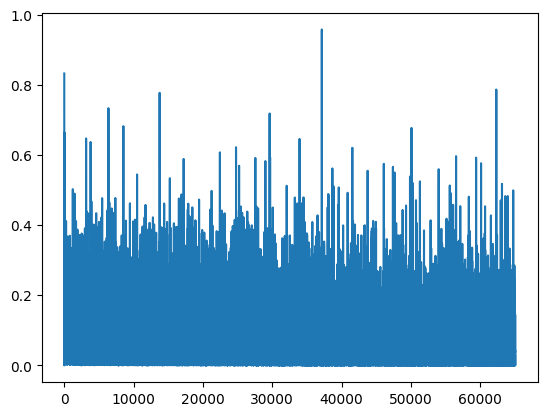

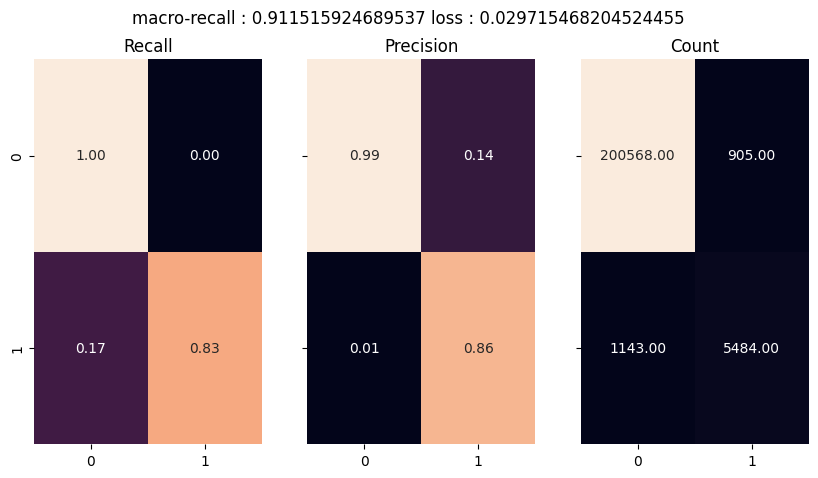

In [62]:
lossi = []
model.train()

for i in range(10):
    for (X_tr,y_tr) in tqdm(trainloader):
        X_tr,y_tr = X_tr.to(device),y_tr.to(device)
        logits = model(X_tr)
        loss = criterion(logits,y_tr)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        lossi.append(loss.item())
        
plt.plot(lossi)
print(torch.tensor(lossi).mean())
test_evaluation(trainloader,model,criterion)

100%|██████████| 666/666 [00:00<00:00, 1844.48it/s]


(3.184189154734407,
 tensor([[1.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]),
 tensor([[0.0000],
         [0.0000],
         [0.0001],
         ...,
         [0.0000],
         [0.0000],
         [0.0000]]))

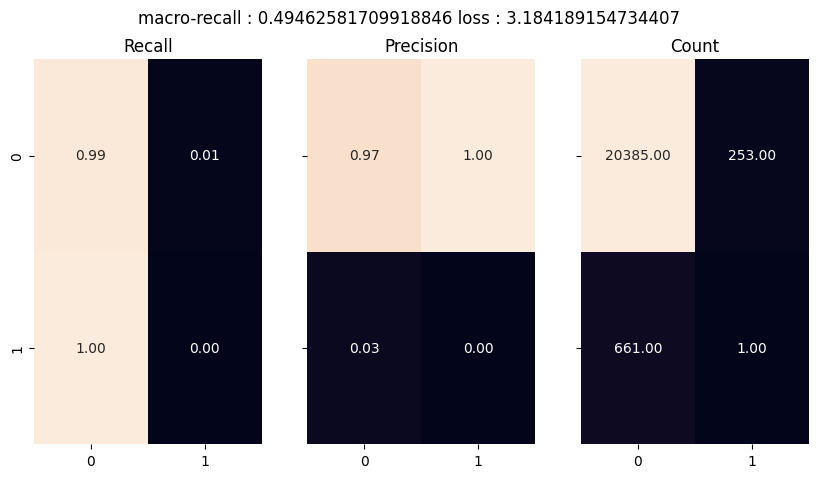

In [66]:
i = 8
X,y = load_nursing_by_index(i)
Xw,yw = load_and_window_nursing_list_for_convolution([i],data_dir=f'../data/nursingv1/',label_dir=f'../data/nursingv1_andrew/',window_size=window_size)
logits = model(Xw.to(device))
logits = torch.sigmoid(torch.cat([torch.zeros(window_size//2),logits.detach().cpu().flatten(),torch.zeros(window_size//2)]))
df = pd.DataFrame(X.numpy(),columns=['x','y','z'])
df['logits'] = logits.numpy()*10
fig = px.line(df)
fig.show(renderer='browser')
window_size = 101
testloader = DataLoader(TensorDataset(*load_and_window_nursing_list_for_convolution([i],data_dir=f'../data/nursingv1/',label_dir=f'../data/nursingv1_andrew/',window_size=window_size)),batch_size=32,shuffle=True)
test_evaluation(testloader,model,criterion)

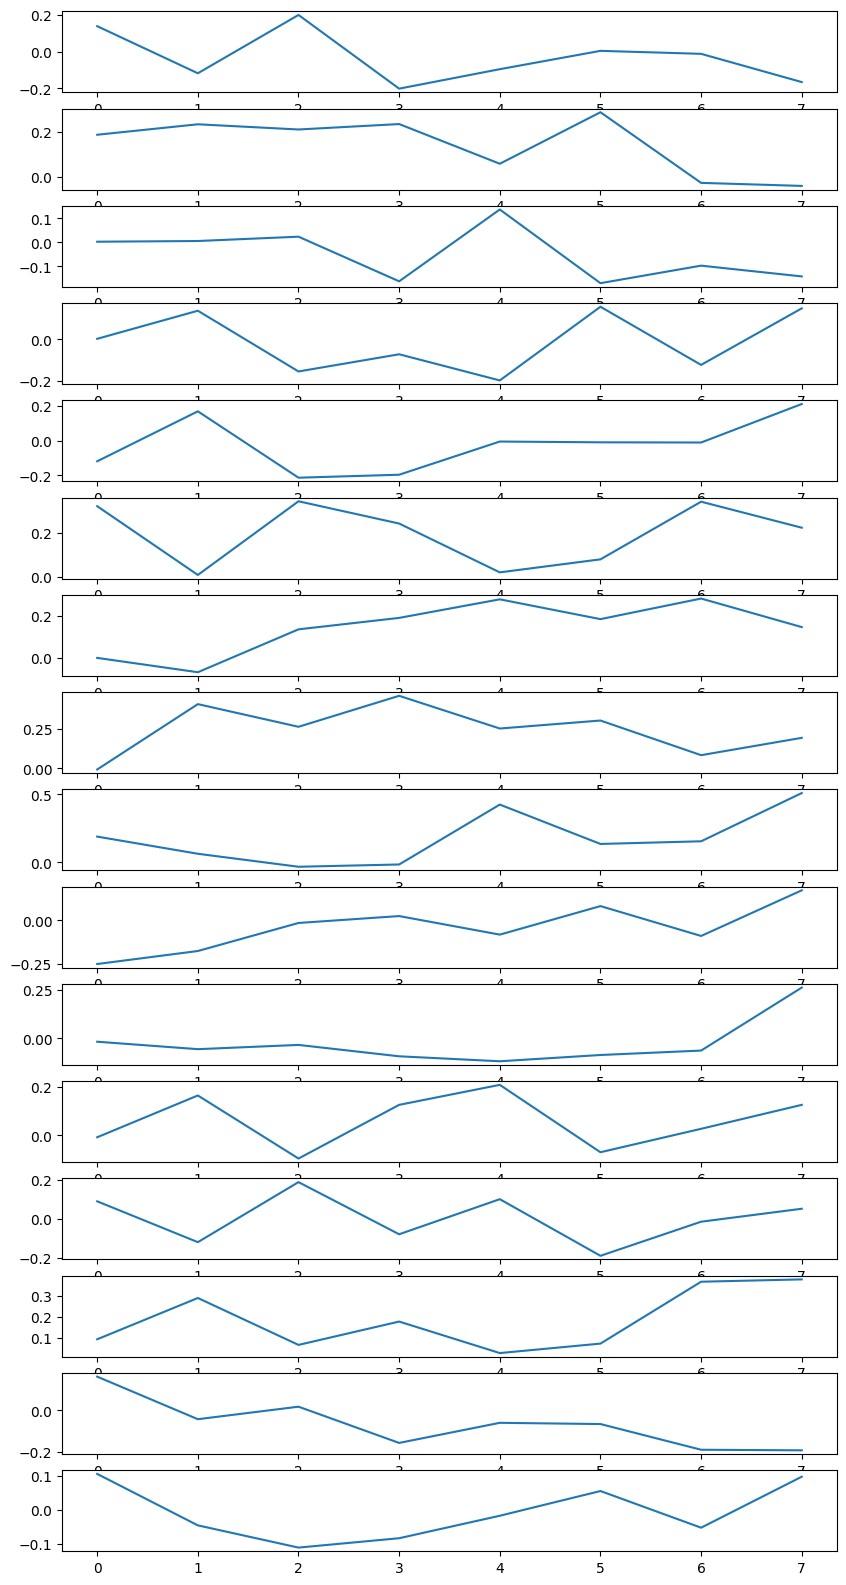

In [58]:
import matplotlib.pyplot as plt
weights = model.c1.weight
fig,axes = plt.subplots(nrows=len(weights),ncols=1,figsize=(10,20))
for i in range(len(weights)):
    axes[i].plot(weights[i,1,:].squeeze().detach().cpu())
plt.savefig('kernels.jpg',dpi=500)

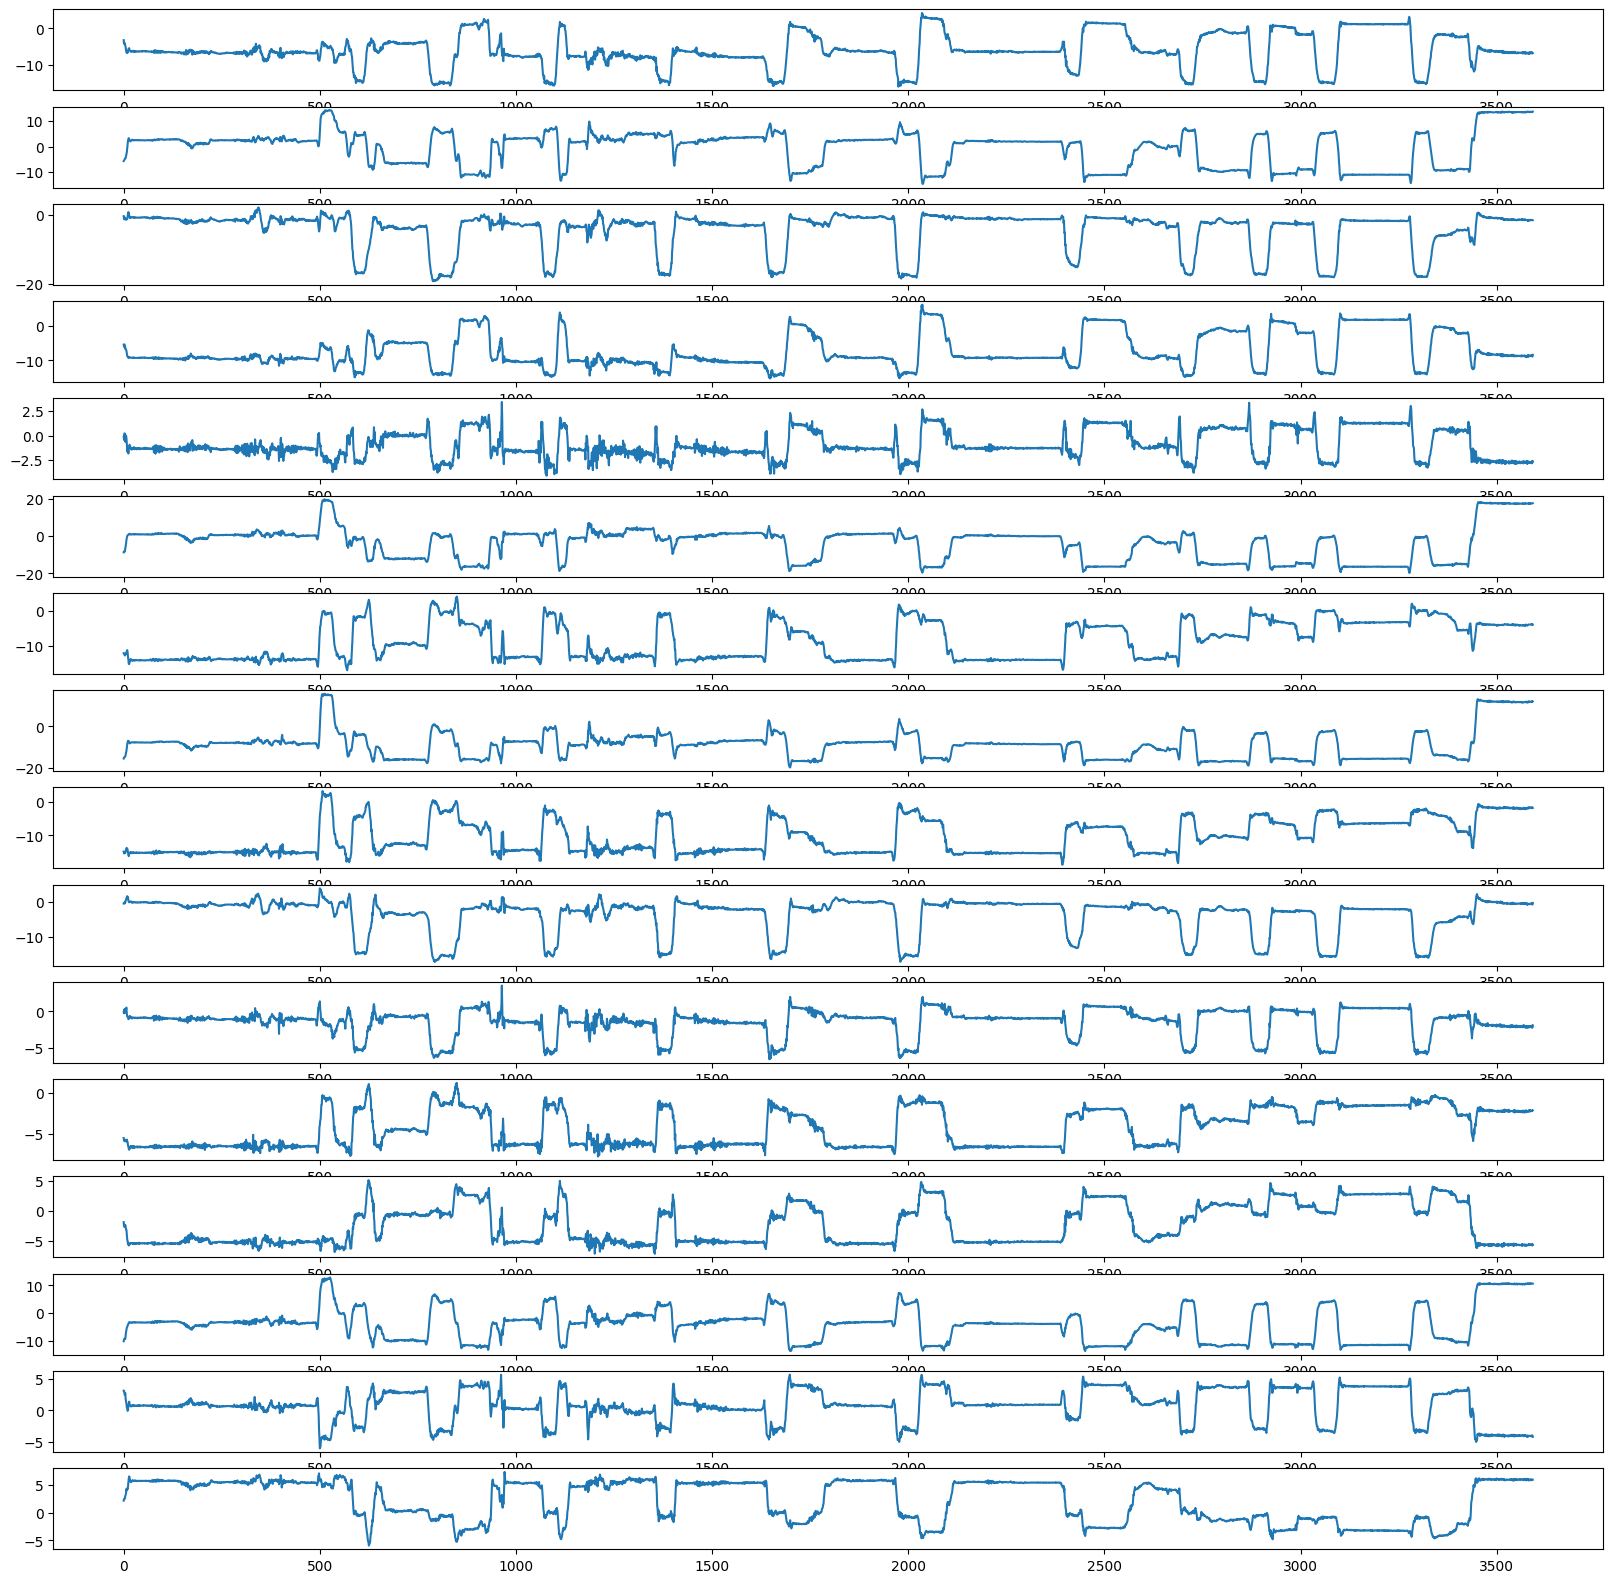

In [59]:
feature_maps = model.c1(X.T.cuda())
fig,axes = plt.subplots(nrows=len(feature_maps),ncols=1,figsize=(20,20))
for i in range(len(feature_maps)):
    axes[i].plot(feature_maps[i][25000:].detach().cpu())
plt.savefig('kernels.jpg',dpi=500)

100%|██████████| 647/647 [00:00<00:00, 2124.42it/s]


(6.506587859188652,
 tensor([[1.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]),
 tensor([[0.0000e+00],
         [4.8557e-16],
         [3.2418e-16],
         ...,
         [4.1763e-16],
         [0.0000e+00],
         [0.0000e+00]]))

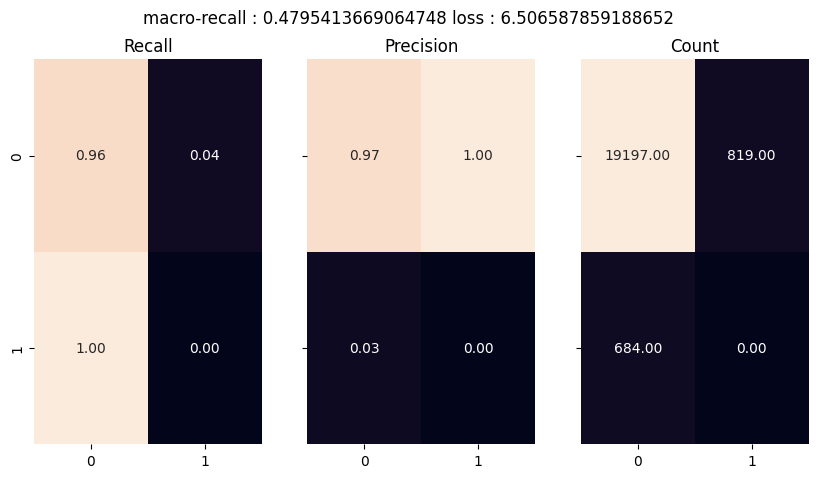